<center>
    <h1 style="font-family: Georgia, sans-serif; font-size: 35px; font-weight: bold; color:black; line-height: 1.3;">
     Optimizing Aid Distribution Unsupervised Learning
    </h1>
</center>

## PROBLEM STATEMENT

###### Objective:
To categorise the countries using socio-economic and health factors that determine the overall development of the country.
###### About organization:
HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities.
###### Problem Statement:
HELP International have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. So, CEO has to make decision to choose the countries that are in the direst need of aid. Hence, your Job as a Data scientist is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.


## Importing the necessary libraries

In [1]:
# For data manipulation and analysis
import numpy as np 
import pandas as pd  

# For plotting graphs and visualizations
import seaborn as sns  
import matplotlib.pyplot as plt 
import plotly.express as px

# For statistical functions and tests
import scipy.stats as stat 

# To manage warning messages
import warnings 
warnings.filterwarnings('ignore') 

# For clustering algorithms
from sklearn.cluster import KMeans, AgglomerativeClustering  

# For visualizing clustering metrics
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer  

# For evaluating clustering performance
from sklearn.metrics import silhouette_score  

# For hierarchical clustering and dendrograms
from scipy.cluster.hierarchy import linkage, dendrogram, cophenet  

# For calculating distance metrics
from sklearn.metrics.pairwise import euclidean_distances 

# For dimensionality reduction
from sklearn.decomposition import PCA  

# For standardizing data
from sklearn.preprocessing import StandardScaler  

## Loading the dataset

In [2]:
df=pd.read_csv('Country-data.csv')

In [3]:
df.sample(5)

country  child_mort  exports  health  imports  income  \
9               Azerbaijan        39.2     54.3    5.88     20.7   16000   
19                 Bolivia        46.6     41.2    4.84     34.3    5410   
20  Bosnia and Herzegovina         6.9     29.7   11.10     51.3    9720   
93              Madagascar        62.2     25.0    3.77     43.0    1390   
70               Indonesia        33.3     24.3    2.61     22.4    8430   

    inflation  life_expec  total_fer  gdpp  
9       13.80        69.1       1.92  5840  
19       8.78        71.6       3.20  1980  
20       1.40        76.8       1.31  4610  
93       8.79        60.8       4.60   413  
70      15.30        69.9       2.48  3110

# Data Exploration and Preprocessing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


- **Entries and Columns:** 167 entries (countries) and 10 columns representing socio-economic and health factors.
- **Column Types:** 7 float64 columns (e.g., child_mort, exports), 2 int64 columns (income, gdpp), and 1 object column (country).
- **No Missing Values:** All columns have 167 non-null entries.
- **Memory Usage:** Approximately 13.2 KB.
- **Analysis Suitability:** Ideal for clustering analysis to identify countries with similar profiles for aid allocation.

## Setting 'country' as Index
We will set 'country' as the index because it uniquely identifies each record in the dataset. This will make our data analysis more efficient and organized.

In [5]:
df.set_index('country',inplace=True)

In [6]:
df.sample(5)

child_mort  exports  health  imports  income  inflation  \
country                                                                
New Zealand         6.2     30.3   10.10     28.0   32300       3.73   
Mozambique        101.0     31.5    5.21     46.2     918       7.64   
Niger             123.0     22.2    5.16     49.1     814       2.55   
Ireland             4.2    103.0    9.19     86.5   45700      -3.22   
Seychelles         14.4     93.8    3.40    108.0   20400      -4.21   

             life_expec  total_fer   gdpp  
country                                    
New Zealand        80.9       2.17  33700  
Mozambique         54.5       5.56    419  
Niger              58.8       7.49    348  
Ireland            80.4       2.05  48700  
Seychelles         73.4       2.17  10800

## Examining the Correlation
We will analyze the correlation between the various socio-economic and health factors in the dataset. This will help us understand the relationships between different variables and identify patterns that can inform our clustering analysis.

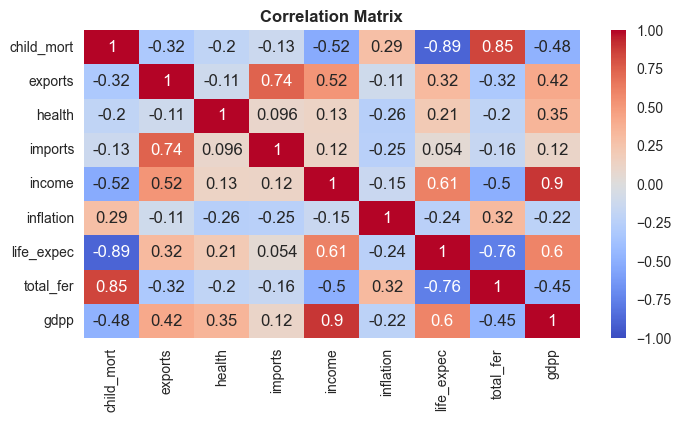

In [7]:
plt.figure(figsize=(8, 4))
sns.heatmap(df.corr(), annot=True, vmax=1, vmin=-1, cmap='coolwarm')
plt.title('Correlation Matrix', fontweight='bold')
plt.show()

- **Child Mortality:**
Negatively correlated with life_expec (-0.887) and income (-0.524).
Positively correlated with total_fer (0.848).

- **Income:**
Positively correlated with gdpp (0.896) and life_expec (0.612).
Moderately correlated with exports (0.517).

- **Total Fertility Rate:**
Negatively correlated with life_expec (-0.761) and income (-0.502).

- **Exports:**
Moderately correlated with income (0.517) and imports (0.737).

- **GDP per Capita:**
Positively correlated with exports (0.419), income (0.896), and life_expec (0.600).

- **Inflation and Health:**
Weak correlations with other variables.

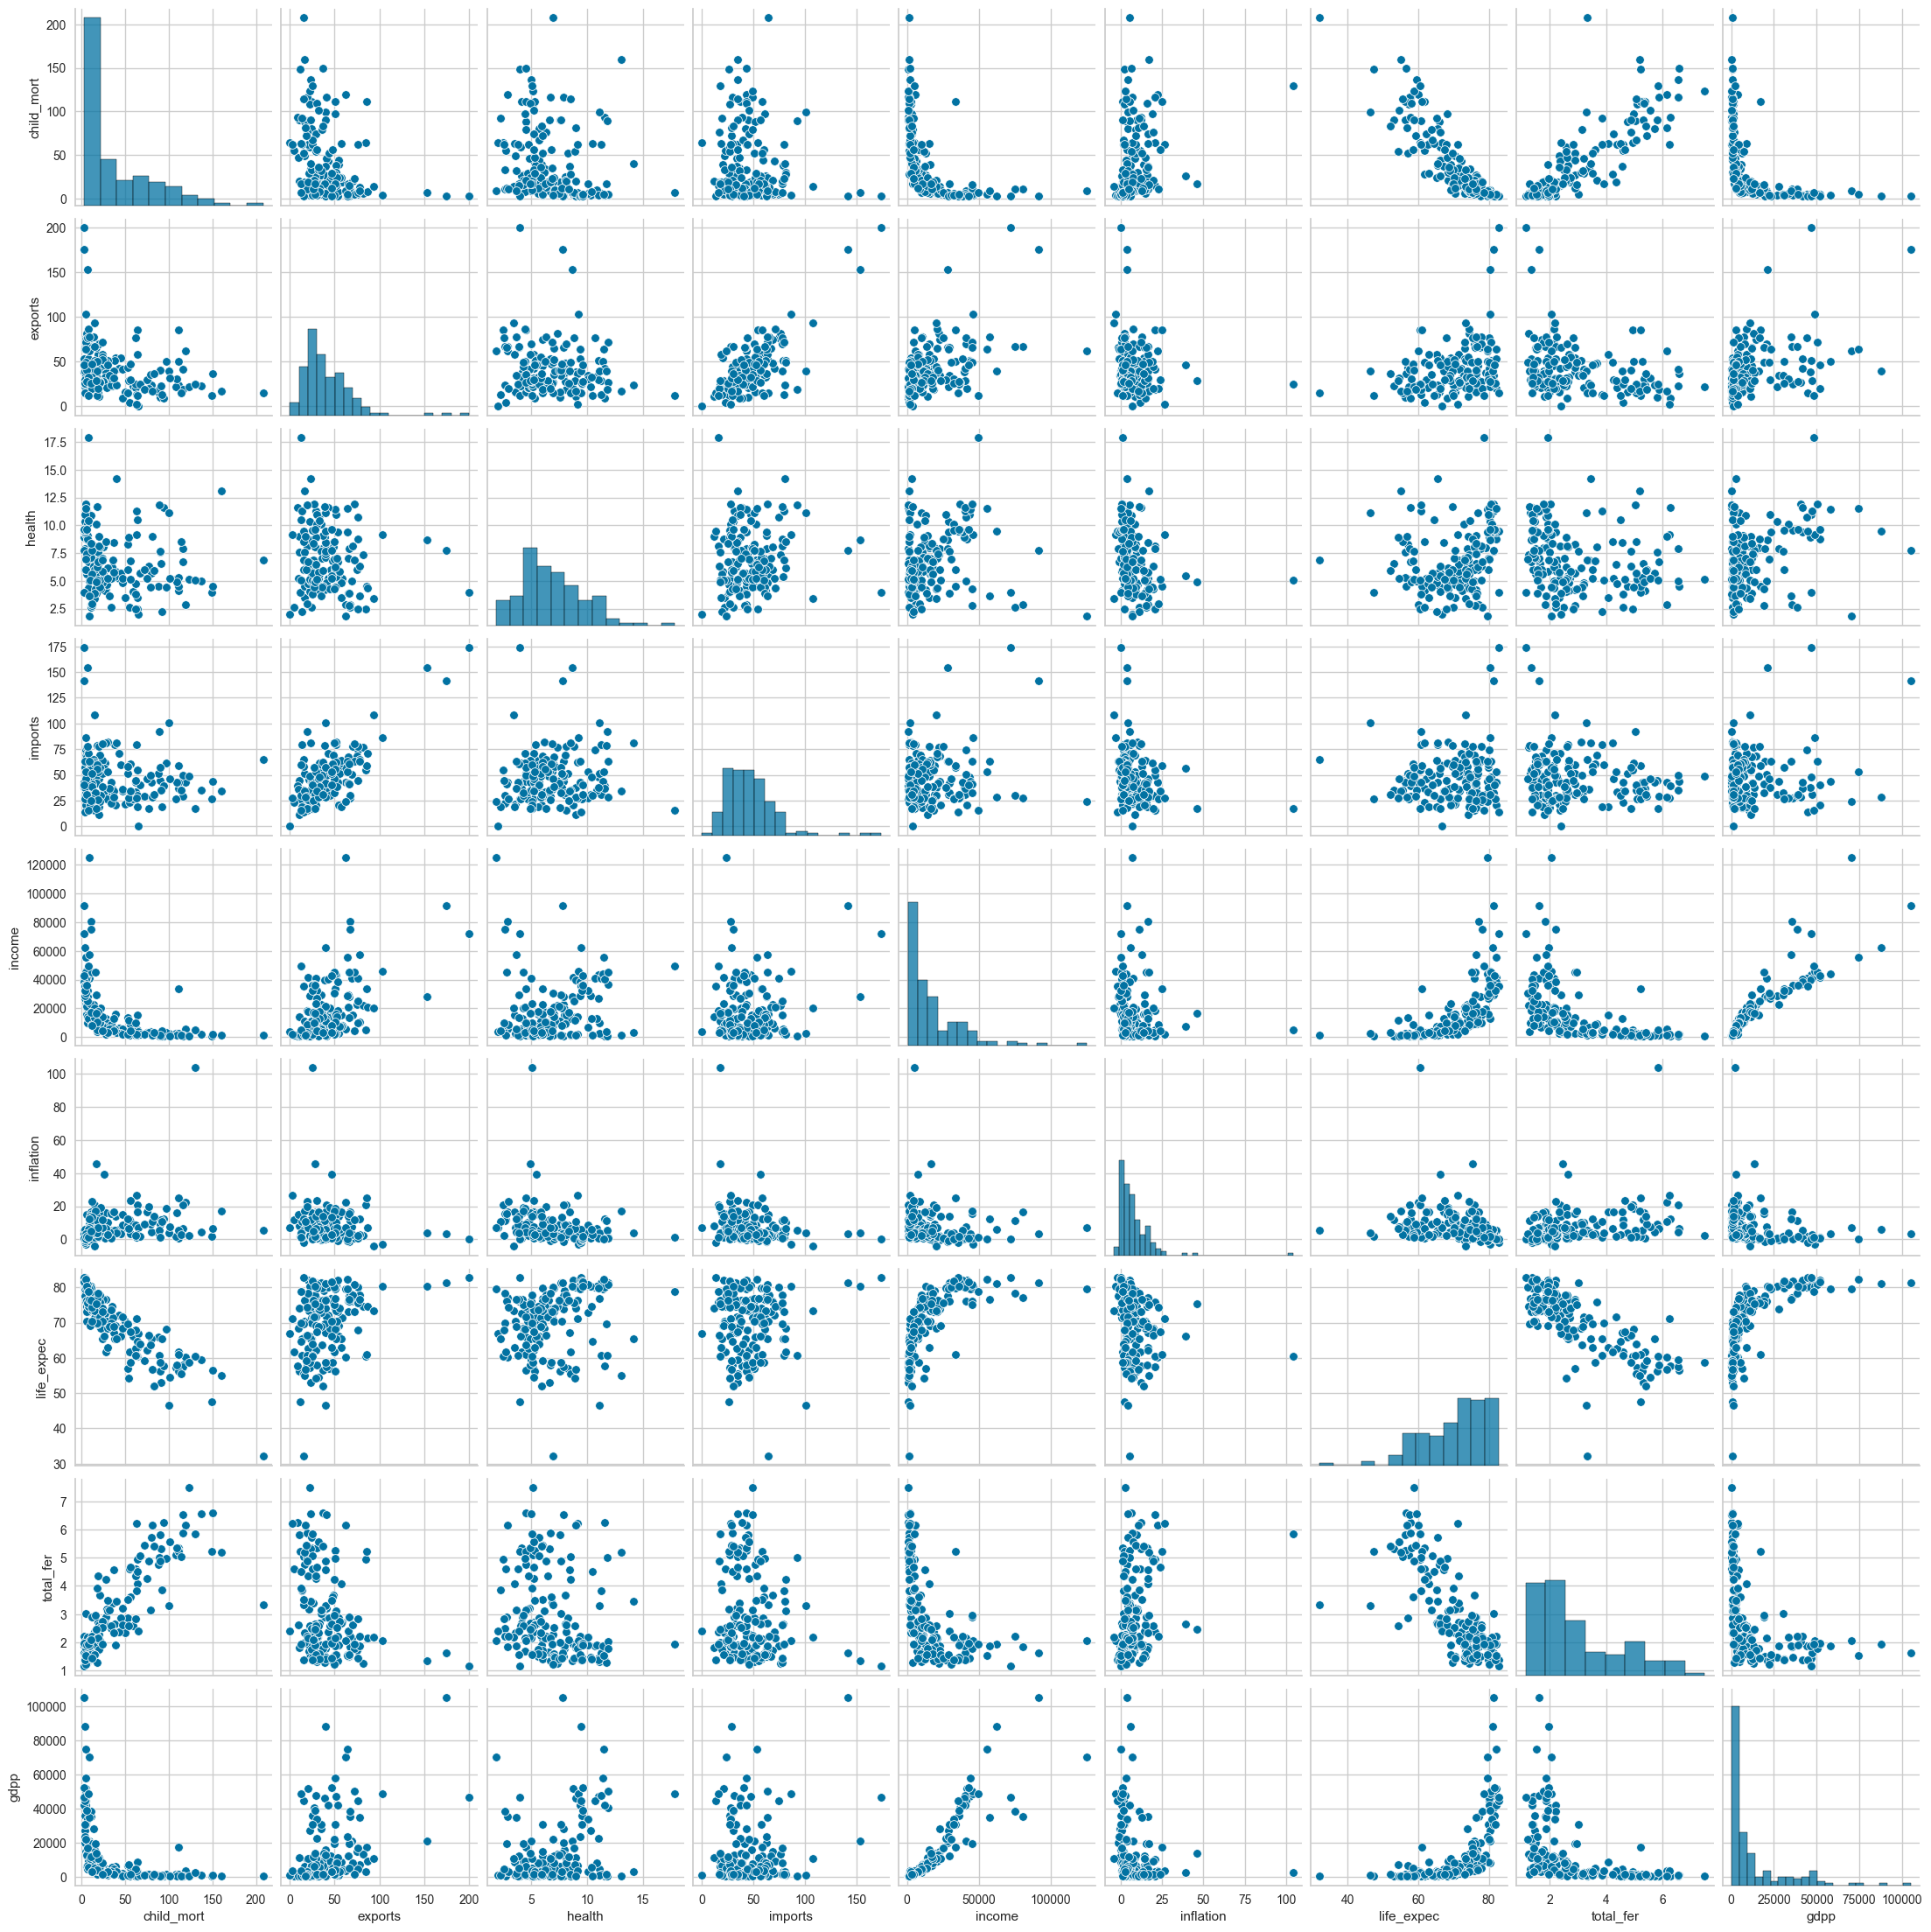

In [8]:
sns.pairplot(df,palette='coolwarm')

###### Child Mortality:

* Strong negative relationship with life_expec (life expectancy): As child mortality decreases, life expectancy increases significantly.
* Positive relationship with total_fer (total fertility rate): Higher child mortality rates are associated with higher fertility rates.
* Negative relationship with income and gdpp: Countries with higher child mortality rates tend to have lower income and GDP per capita.

###### Exports and Imports:

* Positive relationship between exports and imports: Countries with higher export percentages also tend to have higher import percentages.
* Moderate positive relationship between exports and income: Higher export levels are associated with higher income levels.

###### Health Expenditure:

* Weak to moderate positive relationship with gdpp: Higher GDP per capita is generally associated with higher health expenditure.
* Weak relationships with other variables, suggesting that health expenditure does not have a strong direct correlation with most socio-economic factors.

###### Income and GDP per Capita:

* Strong positive relationship between income and gdpp: Countries with higher income levels tend to have higher GDP per capita.
* Negative relationship with child_mort and total_fer: Higher income and GDP per capita are associated with lower child mortality rates and fertility rates.
* Positive relationship with life_expec: Higher income levels and GDP per capita are linked to higher life expectancy.

###### Life Expectancy:

* Strong negative relationship with total_fer: Higher life expectancy is associated with lower fertility rates.
* Strong negative relationship with child_mort: Higher life expectancy is associated with lower child mortality rates.
###### Inflation:
* Weak relationships with most other variables, indicating that inflation does not have strong direct correlations with the socio-economic and health factors in this dataset.

### Data Quality Check: Null Values

In [9]:
df.isnull().sum()

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

This check confirms that our dataset is complete with no missing values in any of the columns listed. Each column is crucial for our analysis and having no null values means we can proceed with our analysis without needing to handle missing data, which can often complicate or bias results. This completeness adds to the reliability of any conclusions drawn from the dataset.

### Lets check for Outliers

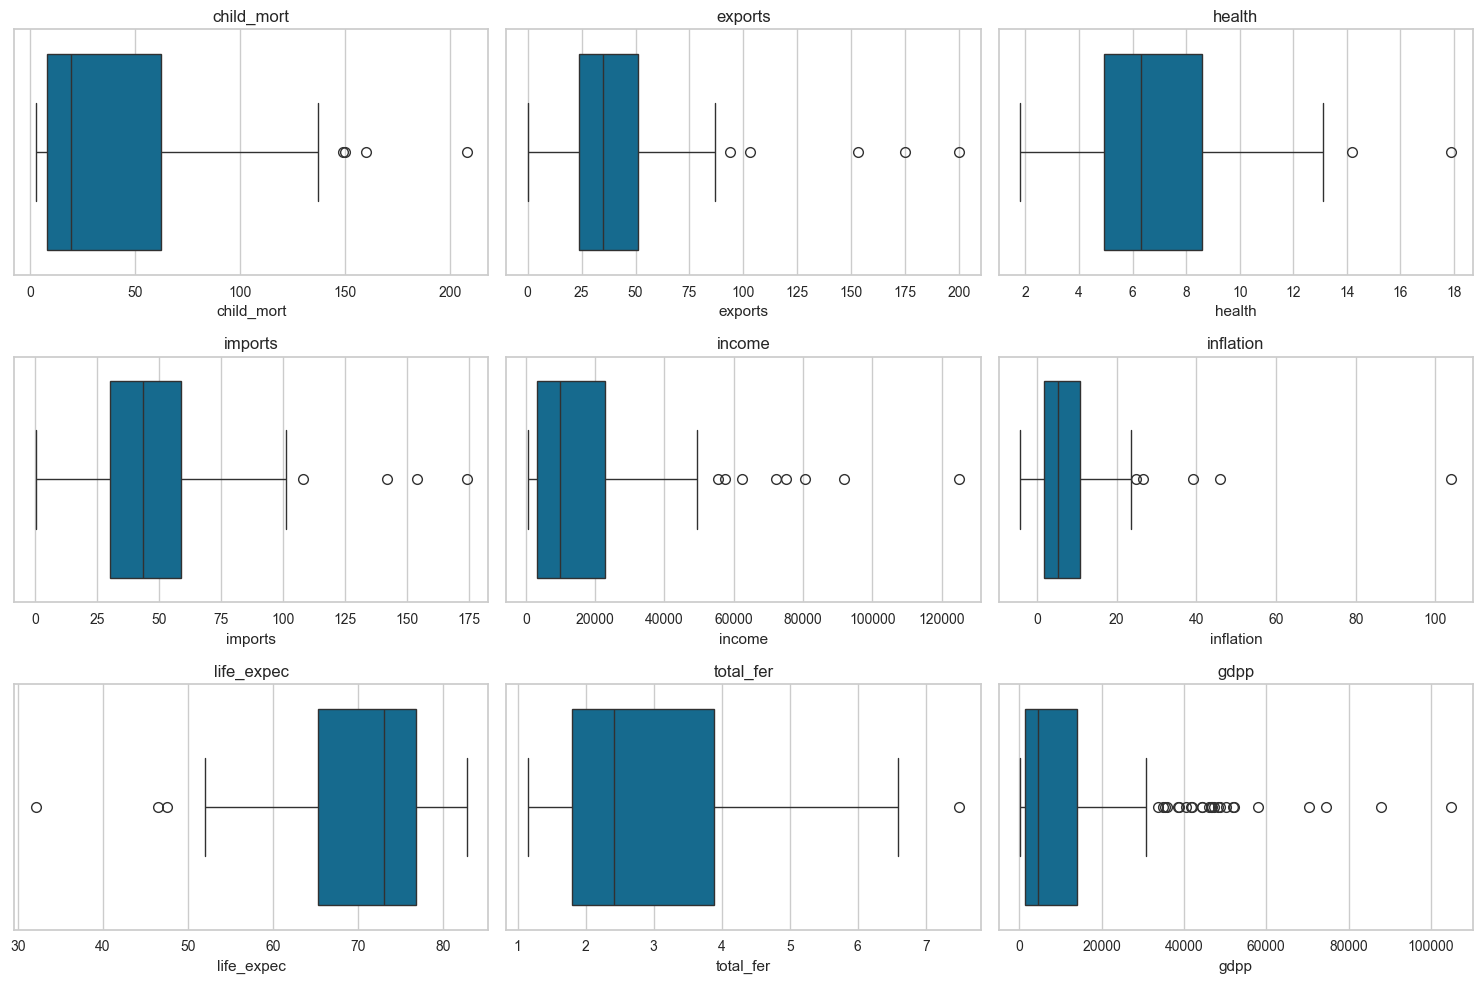

In [10]:
t = 1
plt.figure(figsize=(15, 10)) 

for i in df.columns:
    plt.subplot(3, 3, t)
    sns.boxplot(x=df[i], orient='h')
    plt.title(i)
    t += 1

plt.tight_layout()
plt.show()

* Based on the provided box plots, we have identified extreme outliers in the income, inflation, and gdpp variables. 
* To ensure a more accurate analysis, we will implement the 2.5 IQR (Interquartile Range) rule to cap these extreme values.

In [11]:
for i in ['income','inflation','gdpp']:
    q1,q3=np.quantile(df[i],(0.25,0.75))
    iqr=q3-q1
    ul,ll=q3+2.5*iqr,q1-2.5*iqr
    df[i]=np.where(df[i]>ul,ul,df[i])
    df[i]=np.where(df[i]<ll,ll,df[i])

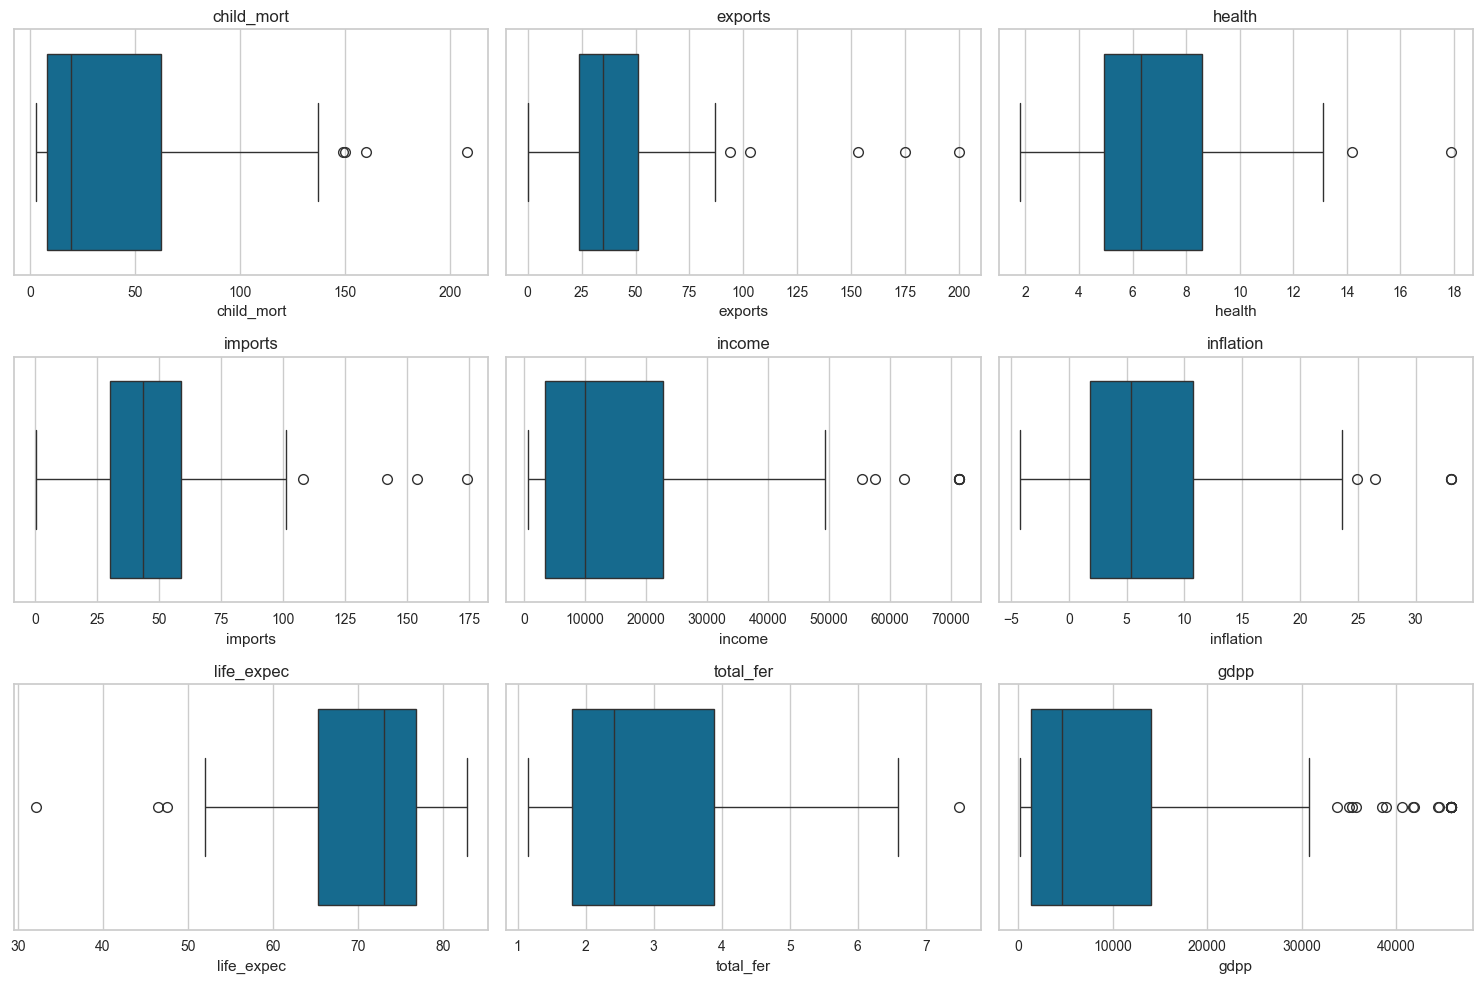

In [12]:
t = 1
plt.figure(figsize=(15, 10)) 

for i in df.columns:
    plt.subplot(3, 3, t)
    sns.boxplot(x=df[i], orient='h')
    plt.title(i)
    t += 1

plt.tight_layout()
plt.show()

## Scaling the Data
Before applying Principal Component Analysis (PCA), it is crucial to scale the data. Scaling ensures that each feature contributes equally to the analysis by standardizing the range of independent variables. Typically, this involves transforming the data so that it has a mean of zero and a standard deviation of one. This step is essential because PCA is sensitive to the variances of the original variables; without scaling, features with larger ranges would dominate the principal components, leading to biased results.

In [13]:
sc=StandardScaler()

In [14]:
dfs=pd.DataFrame(sc.fit_transform(df),columns=df.columns,index=df.index)

In [15]:
dfs

child_mort   exports    health   imports    income  \
country                                                                   
Afghanistan            1.291532 -1.138280  0.279088 -0.082455 -0.878427   
Albania               -0.538949 -0.479658 -0.097016  0.070837 -0.391534   
Algeria               -0.272833 -0.099122 -0.966073 -0.641762 -0.217727   
Angola                 2.007808  0.775381 -1.448071 -0.165315 -0.627373   
Antigua and Barbuda   -0.695634  0.160668 -0.286894  0.497568  0.145102   
...                         ...       ...       ...       ...       ...   
Vanuatu               -0.225578  0.200917 -0.571711  0.240700 -0.800009   
Venezuela             -0.526514 -0.461363 -0.695862 -1.213499 -0.007052   
Vietnam               -0.372315  1.130305  0.008877  1.380030 -0.709887   
Yemen                  0.448417 -0.406478 -0.597272 -0.517472 -0.710472   
Zambia                 1.114951 -0.150348 -0.338015 -0.662477 -0.780697   

                     inflation  life_expec  total_fer      gdpp  
country                                                          
Afghanistan           0.303790   -1.619092   1.902882 -0.767399  
Albania              -0.381016    0.647866  -0.859973 -0.526335  
Algeria               1.225166    0.670423  -0.038404 -0.501118  
Angola                2.096738   -1.179234   2.128151 -0.564502  
Antigua and Barbuda  -0.802968    0.704258  -0.541946  0.026399  
...                        ...         ...        ...       ...  
Vanuatu              -0.639721   -0.852161   0.365754 -0.602669  
Venezuela             3.577027    0.546361  -0.316678  0.115000  
Vietnam               0.671787    0.286958  -0.661206 -0.715806  
Yemen                 2.262752   -0.344633   1.140944 -0.715806  
Zambia                0.934642   -2.092785   1.624609 -0.705582  

[167 rows x 9 columns]

## Applying PCA for Dimensionality Reduction
To streamline our dataset and enhance the efficiency of our analysis, we will apply Principal Component Analysis (PCA). PCA is a statistical technique that transforms the original variables into a new set of uncorrelated variables, called principal components, which capture the maximum variance in the data. By reducing the dimensionality of our dataset, PCA helps to simplify the data structure, making it easier to visualize and analyze while retaining most of the essential information.

In [16]:
print('Row:',df.shape[0])
print('Column:',df.shape[1])

Row: 167
Column: 9


In [17]:
pca=PCA(n_components=9)

In [18]:
dfs_pca=pd.DataFrame(pca.fit_transform(dfs),columns=range(1,10),index=df.index)

In [19]:
dfs_pca

1         2         3         4         5  \
country                                                                 
Afghanistan         -2.976983 -0.032841 -0.932610  0.789299  0.002730   
Albania              0.420479 -0.456931 -0.080523 -1.318985  0.111028   
Algeria             -0.423936 -0.407533  1.658485 -0.478689  0.389953   
Angola              -3.167254  1.504973  1.630109  1.526512  0.096293   
Antigua and Barbuda  1.116417  0.224792 -0.116042 -0.862830 -0.369262   
...                       ...       ...       ...       ...       ...   
Vanuatu             -0.841494  0.680450 -0.332940 -0.797223 -0.510282   
Venezuela           -0.579641 -1.253703  3.079860  0.484351  1.943542   
Vietnam              0.327842  1.533762  0.231331 -1.004264  1.288335   
Yemen               -2.136859 -0.163968  1.500716  0.450588  1.107161   
Zambia              -2.989555  0.343467  0.158097  0.953086 -0.012743   

                            6         7         8         9  
country                                                      
Afghanistan         -0.262191  0.416696 -0.373026  0.076627  
Albania              0.042683  0.163434  0.273873  0.148639  
Algeria             -0.371683 -0.080897  0.233012  0.057846  
Angola              -0.451189 -0.334483  0.330121 -0.259418  
Antigua and Barbuda -0.235218  0.200057  0.034177  0.089805  
...                       ...       ...       ...       ...  
Vanuatu             -0.009033 -0.122974 -0.685673 -0.291868  
Venezuela            0.110130  0.253283  0.163679 -0.381777  
Vietnam              0.050252 -0.167081  0.262921 -0.163044  
Yemen               -0.489837  0.137117 -0.015546 -0.124555  
Zambia               0.255166 -0.327837 -0.777784 -0.228843  

[167 rows x 9 columns]

### Applying Kaiser's Criterion
Using Kaiser's Criterion, we examined the eigenvalues of the principal components derived from our dataset. The eigenvalues are as follows:

In [20]:
pca.explained_variance_

array([4.31207333, 1.56974591, 1.19878755, 0.92471919, 0.5956137 ,
       0.22264376, 0.10396867, 0.0834602 , 0.04320456])

According to Kaiser's Criterion, we retain only those components with eigenvalues greater than one:
* In this case, the first three principal components (with eigenvalues 4.31, 1.57, and 1.20) meet this criterion. 
* These components collectively capture the most significant variance in the data, allowing us to effectively reduce the dimensionality while preserving the essential information.

In [21]:
np.cumsum(pca.explained_variance_ratio_)

array([0.47625028, 0.64962209, 0.78202311, 0.88415443, 0.94993745,
       0.97452751, 0.98601041, 0.99522824, 1.        ])

First three components explain approximately 78.2% of the total variance, which is a substantial amount, indicating that we can effectively reduce the dimensionality of our dataset from nine to three dimensions while preserving most of the original information.

### Scree Plot
A Scree Plot is a graphical representation used in Principal Component Analysis (PCA) to show the eigenvalues of each principal component. The eigenvalues are plotted in descending order to visualize the relative importance of each component. The purpose of the scree plot is to help identify the point at which the addition of further components yields diminishing returns in terms of explained variance. This "elbow" point helps to determine the optimal number of components to retain for further analysis.

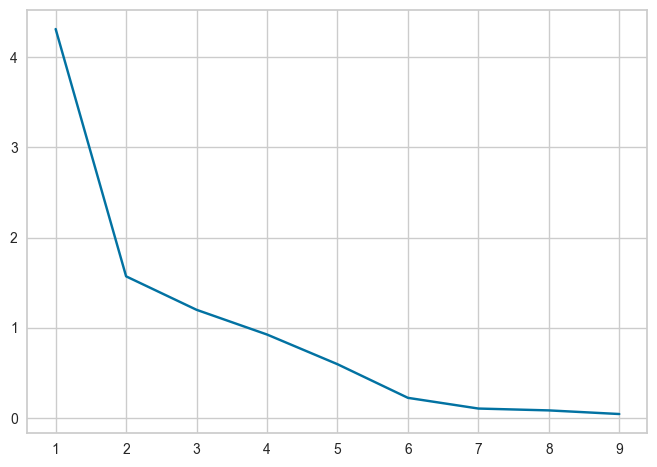

In [22]:
plt.plot(range(1,10),pca.explained_variance_)
plt.show()

The scree plot suggests that the first two or three principal components can effectively summarize the data, allowing for efficient dimensionality reduction and further analysis.

### Deciding the Percentage of Total Variance
To determine the optimal number of principal components for our analysis, we decide to retain components that collectively explain 95% of the total variance in the dataset.

In [23]:
# Total Explained Variance ratio
np.cumsum(pca.explained_variance_ratio_)

array([0.47625028, 0.64962209, 0.78202311, 0.88415443, 0.94993745,
       0.97452751, 0.98601041, 0.99522824, 1.        ])

### Reducing to Five Dimensions
In our effort to streamline the dataset while preserving the essential information, we will reduce the dimensionality to five principal components. This step ensures that we capture a significant portion of the total variance (95%), making our dataset more manageable and efficient for further analysis and modeling.

In [24]:
pca_final=PCA(n_components=5)

In [25]:
dfs_pca_final=pd.DataFrame(pca_final.fit_transform(dfs),columns=range(1,6),index=df.index)

In [26]:
dfs_pca_final

1         2         3         4         5
country                                                              
Afghanistan         -2.976983 -0.032841 -0.932610  0.789299  0.002730
Albania              0.420479 -0.456931 -0.080523 -1.318985  0.111028
Algeria             -0.423936 -0.407533  1.658485 -0.478689  0.389953
Angola              -3.167254  1.504973  1.630109  1.526512  0.096293
Antigua and Barbuda  1.116417  0.224792 -0.116042 -0.862830 -0.369262
...                       ...       ...       ...       ...       ...
Vanuatu             -0.841494  0.680450 -0.332940 -0.797223 -0.510282
Venezuela           -0.579641 -1.253703  3.079860  0.484351  1.943542
Vietnam              0.327842  1.533762  0.231331 -1.004264  1.288335
Yemen               -2.136859 -0.163968  1.500716  0.450588  1.107161
Zambia              -2.989555  0.343467  0.158097  0.953086 -0.012743

[167 rows x 5 columns]

In [27]:
np.sum(pca_final.explained_variance_ratio_)

0.949937449913887

# K-Means Clustering
K-Means Clustering is an unsupervised learning algorithm used to partition data into distinct clusters based on similarity. By minimizing the variance within each cluster, K-Means identifies central points (centroids) and groups data points around them. This technique helps uncover hidden patterns and groupings in the data, making it valuable for exploratory data analysis.


### Determining the Optimal Number of Clusters using the Elbow Method

In [28]:
k_elbow=KElbowVisualizer(KMeans(),k=10)

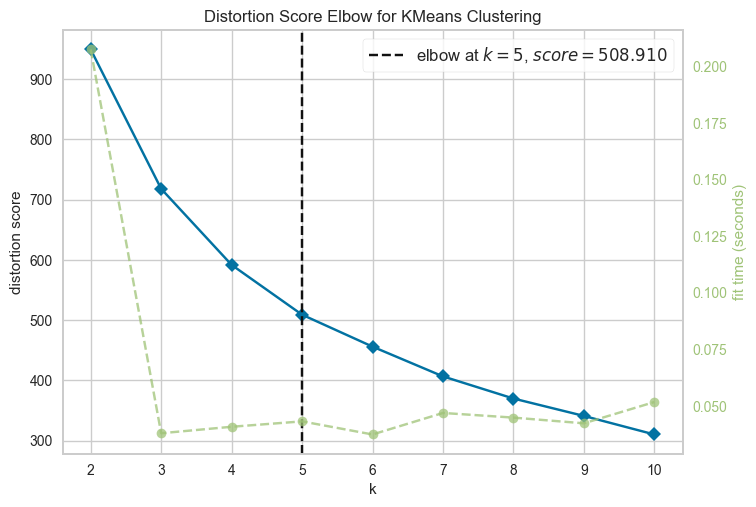

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [29]:
k_elbow.fit(dfs_pca_final)
k_elbow.show()

The elbow method suggests that k = 5 is the optimal number of clusters for KMeans clustering in this dataset. This choice balances the trade-off between the distortion score and the number of clusters, ensuring that the data is well-grouped without overfitting.







### Silhouette Analysis for Optimal K in K-Means Clustering
- To determine the optimal number of clusters (k) for our K-Means Clustering, we perform a silhouette analysis. Silhouette analysis measures how similar each data point is to its own cluster compared to other clusters, providing an indication of the clustering quality. The silhouette score ranges from -1 to 1, where a higher score indicates better-defined clusters.

- We evaluate the silhouette score for different values of k (from 2 to 7) to identify the number of clusters that yields the best performance. By visualizing these scores, we can make an informed decision about the optimal k for our dataset.


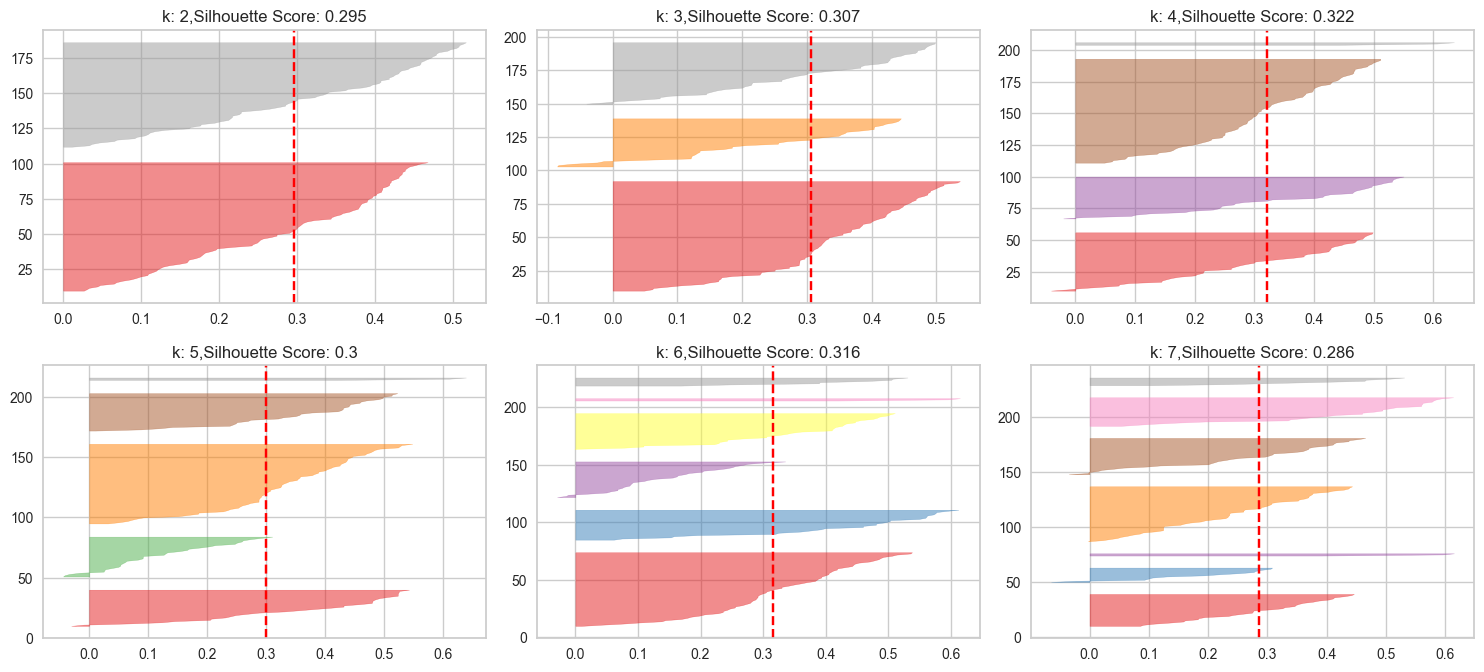

In [30]:
t=1
plt.figure(figsize=(15,10))
for i in range(2,8):
    plt.subplot(3,3,t)
    model=KMeans(n_clusters=i)
    sil_viz=SilhouetteVisualizer(model)
    sil_viz.fit(dfs_pca_final)
    plt.title(f'k: {i},Silhouette Score: {round(sil_viz.silhouette_score_,3)}')
    t+=1
plt.tight_layout()
plt.show()

###### Inference:
* If k>=4, we observe the formation of very small clusters. Therefore, it is advisable to opt for either 2 or 3 clusters to avoid these small, less meaningful groupings.
* Choosing k = 3 strikes an optimal balance between maintaining a simple, interpretable model and achieving adequate cluster separation, making it a robust choice for practical and actionable clustering analysis.

In [31]:
final_kmean=KMeans(n_clusters=3)

In [32]:
kmean_pred=final_kmean.fit_predict(dfs_pca_final)

In [33]:
kmean_pred

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 1,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 2, 0,
       2, 0, 1, 0, 0, 0, 2, 1, 1, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       1, 1, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 1, 1, 1, 0, 2, 1, 1, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2])

### Business Interpretation

In [34]:
df['K-Mean Label']=kmean_pred

In [35]:
df.sample(5)

child_mort  exports  health  imports   income  \
country                                                                   
Central African Republic       149.0     11.8    3.98     26.5    888.0   
United Arab Emirates             8.6     77.7    3.66     63.6  57600.0   
Mozambique                     101.0     31.5    5.21     46.2    918.0   
South Africa                    53.7     28.6    8.94     27.4  12000.0   
Austria                          4.3     51.3   11.00     47.8  43200.0   

                          inflation  life_expec  total_fer     gdpp  \
country                                                               
Central African Republic      2.010        47.5       5.21    446.0   
United Arab Emirates         12.500        76.5       1.87  35000.0   
Mozambique                    7.640        54.5       5.56    419.0   
South Africa                  6.350        54.3       2.59   7280.0   
Austria                       0.873        80.5       1.44  45850.0   

                          K-Mean Label  
country                                 
Central African Republic             2  
United Arab Emirates                 1  
Mozambique                           2  
South Africa                         2  
Austria                              1

In [36]:
df['K-Mean Label'].value_counts()

K-Mean Label
0    83
2    47
1    37
Name: count, dtype: int64

In [37]:
df.groupby(by='K-Mean Label').mean()

child_mort    exports    health    imports        income  \
K-Mean Label                                                             
0              22.025301  40.307096  6.180602  47.518866  12177.951807   
1               5.237838  58.097297  8.782973  51.281081  42690.878378   
2              92.961702  29.151277  6.388511  42.323404   3942.404255   

              inflation  life_expec  total_fer          gdpp  
K-Mean Label                                                  
0              7.469506   72.802410   2.312892   6227.253012  
1              2.588432   79.956757   1.755676  36905.405405  
2             10.511170   59.187234   5.008085   1922.382979

In [38]:
silhouette_score(dfs_pca_final,kmean_pred)

0.3067977051283319

The silhouette score of 0.3068 indicates that the clustering has captured some meaningful patterns in the data, but further refinement may be necessary to enhance the cluster separation and improve the overall quality of the clustering.

In [39]:
centroids=final_kmean.cluster_centers_

In [40]:
centroids

array([[ 0.135945  , -0.05639663,  0.24693038, -0.74951387,  0.1648213 ],
       [ 2.854884  , -0.26212462, -0.17395163,  0.84526724, -0.23278656],
       [-2.48753496,  0.30594747, -0.29912789,  0.65818645, -0.10780991]])

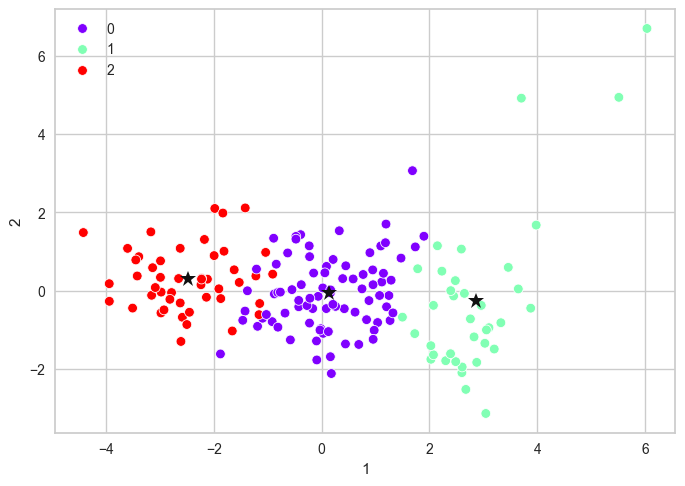

In [41]:
sns.scatterplot(x=dfs_pca_final[1],y=dfs_pca_final[2],hue=kmean_pred,palette='rainbow')
for i in range(3):
    plt.plot(centroids[i][0],centroids[i][1],marker='*',color='k',ms=12)

- The scatter plot shows three distinct clusters, each represented by different colors (purple, green, and red).
- The clusters are reasonably well-separated, indicating that the KMeans algorithm has effectively grouped similar data points together.
- The centroids of the three clusters are marked with black stars. These centroids represent the mean position of all the data points in each cluster.
- The centroids are positioned at the center of their respective clusters, indicating that they accurately represent the central tendency of the clusters.


# Agglomerative Clustering
Agglomerative Clustering is a type of hierarchical clustering algorithm used to build a hierarchy of clusters. It starts with each data point as a single cluster and iteratively merges the closest pairs of clusters until a specified number of clusters is reached or all data points are clustered together. This method creates a tree-like structure called a dendrogram, which can be useful for visualizing the clustering process and deciding the optimal number of clusters. 

###### By applying Agglomerative Clustering to our dataset, we aim to compare its performance with K-Means Clustering to determine the most effective clustering algorithm for our data.

In [42]:
dist_matrix=euclidean_distances(dfs_pca_final)

In [43]:
dist_matrix.shape

(167, 167)

In [44]:
link_matrix=linkage(dist_matrix,method='ward')

In [45]:
#first_10_rows
link_matrix[:10,]

array([[ 41.        , 121.        ,   1.32413918,   2.        ],
       [ 50.        , 116.        ,   1.43949751,   2.        ],
       [ 34.        , 119.        ,   1.72602078,   2.        ],
       [  8.        ,  44.        ,   1.72608538,   2.        ],
       [ 75.        , 158.        ,   1.76310541,   2.        ],
       [ 17.        ,  28.        ,   1.97336634,   2.        ],
       [  4.        ,  24.        ,   2.16534337,   2.        ],
       [ 18.        ,  52.        ,   2.18147315,   2.        ],
       [ 48.        ,  61.        ,   2.20130579,   2.        ],
       [ 63.        , 166.        ,   2.23603046,   2.        ]])

### Dendrogram
A dendrogram is a tree-like diagram used to visualize the results of hierarchical clustering. It shows how data points are merged into clusters step-by-step. The height of each merge (branch) represents the distance between clusters. By examining the dendrogram, we can decide the optimal number of clusters based on significant merges.

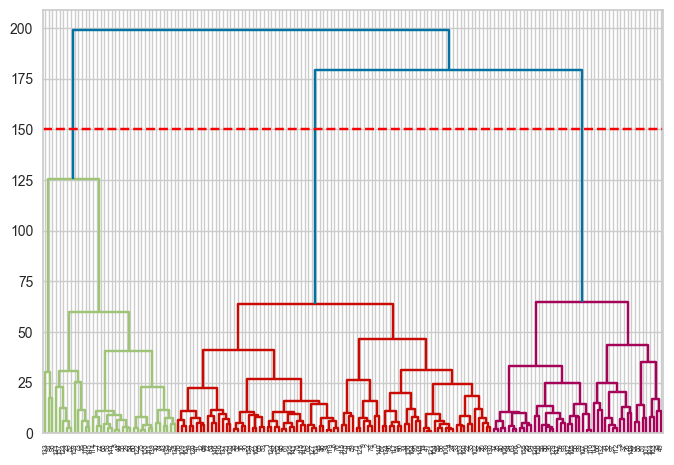

In [46]:
dendrogram(link_matrix)
plt.axhline(y=150,color='red',ls='--')
plt.show()

The dendrogram analysis supports the decision to use k = 3 for clustering. The hierarchical clustering process shows three distinct clusters, which are well-separated and represent meaningful groupings of the data. This aligns with previous analyses and confirms the robustness of the clustering choice.

In [47]:
final_agglo=AgglomerativeClustering(n_clusters=3)

In [48]:
agglo_pred=final_agglo.fit_predict(dfs_pca_final)

In [49]:
silhouette_score(dfs_pca_final,agglo_pred)

0.25980013268090285

The silhouette score of 0.2598 for Agglomerative Clustering indicates moderate clustering quality, with K-Means Clustering showing a marginally better performance in this case. However, both methods provide insights into the data's structure, and the choice between them can be based on additional factors such as interpretability and specific application needs.

<Axes: xlabel='1', ylabel='2'>

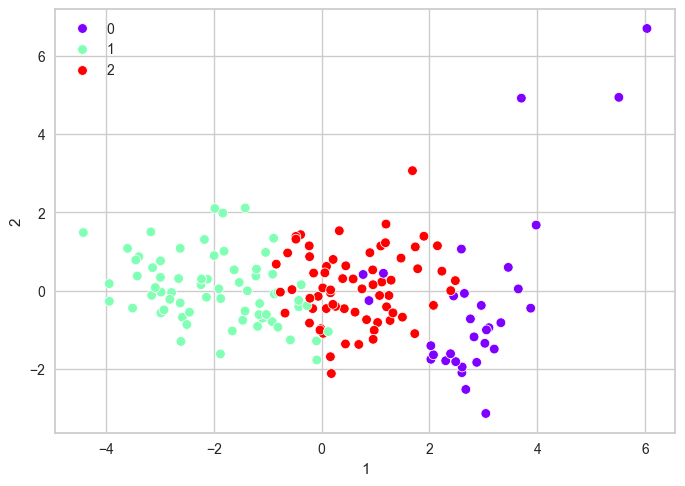

In [50]:
sns.scatterplot(x=dfs_pca_final[1],y=dfs_pca_final[2],hue=agglo_pred,palette='rainbow')

* The scatter plot indicates that agglomerative clustering has more overlapping data points compared to KMeans clustering.
* This suggests that while agglomerative clustering can identify distinct groups, it may also capture more transitional or similar data points within different clusters, leading to more overlap..

## Comparison of Clustering Methods:

#### KMeans Clustering:
* Silhouette Score: 0.307
* The KMeans algorithm with k=3 shows well-defined clusters with minimal overlap between data points, indicating clear separation and distinct groupings.

#### Agglomerative Clustering:

* Silhouette Score: 0.260
* Agglomerative clustering also identifies distinct clusters, but with more overlapping data points compared to KMeans. This overlap suggests less distinct separation between the clusters.

#### Conclusion:
Given the higher silhouette score of 0.307 for KMeans clustering (compared to 0.260 for agglomerative clustering) and the clearer separation of clusters with minimal overlap, **we choose KMeans clustering with k=3 as the final model for our analysis.** This model provides a more precise and actionable segmentation of the data.

# Business Interpretation

In [51]:
df.groupby(by='K-Mean Label').mean()

child_mort    exports    health    imports        income  \
K-Mean Label                                                             
0              22.025301  40.307096  6.180602  47.518866  12177.951807   
1               5.237838  58.097297  8.782973  51.281081  42690.878378   
2              92.961702  29.151277  6.388511  42.323404   3942.404255   

              inflation  life_expec  total_fer          gdpp  
K-Mean Label                                                  
0              7.469506   72.802410   2.312892   6227.253012  
1              2.588432   79.956757   1.755676  36905.405405  
2             10.511170   59.187234   5.008085   1922.382979

###### Cluster 0: Moderate-Income Countries

This cluster represents countries with moderate child mortality, balanced trade (exports and imports), moderate income, and moderate GDP per capita. Health expenditure and life expectancy are also moderate.

###### Cluster 1: High-Income Countries

This cluster represents countries with very low child mortality, high exports and imports, high income, and high GDP per capita. These countries also have high health expenditure, low inflation, and high life expectancy, indicating advanced economies with robust healthcare systems.
###### Cluster 2: Low-Income Countries

 This cluster represents countries with very high child mortality, low exports and imports, low income, and low GDP per capita. These countries have higher inflation rates, lower life expectancy, and higher fertility rates, indicating less developed economies with significant socio-economic challenges.

In [52]:
df['K-Mean Label']=df['K-Mean Label'].map({2:'Underdeveloped',0:'Developing',1:'Developed'})

In [53]:
df

child_mort  exports  health  imports   income  inflation  \
country                                                                         
Afghanistan                90.2     10.0    7.58     44.9   1610.0       9.44   
Albania                    16.6     28.0    6.55     48.6   9930.0       4.49   
Algeria                    27.3     38.4    4.17     31.4  12900.0      16.10   
Angola                    119.0     62.3    2.85     42.9   5900.0      22.40   
Antigua and Barbuda        10.3     45.5    6.03     58.9  19100.0       1.44   
...                         ...      ...     ...      ...      ...        ...   
Vanuatu                    29.2     46.6    5.25     52.7   2950.0       2.62   
Venezuela                  17.1     28.5    4.91     17.6  16500.0      33.10   
Vietnam                    23.3     72.0    6.84     80.2   4490.0      12.10   
Yemen                      56.3     30.0    5.18     34.4   4480.0      23.60   
Zambia                     83.1     37.0    5.89     30.9   3280.0      14.00   

                     life_expec  total_fer     gdpp    K-Mean Label  
country                                                              
Afghanistan                56.2       5.82    553.0  Underdeveloped  
Albania                    76.3       1.65   4090.0      Developing  
Algeria                    76.5       2.89   4460.0      Developing  
Angola                     60.1       6.16   3530.0  Underdeveloped  
Antigua and Barbuda        76.8       2.13  12200.0      Developing  
...                         ...        ...      ...             ...  
Vanuatu                    63.0       3.50   2970.0      Developing  
Venezuela                  75.4       2.47  13500.0      Developing  
Vietnam                    73.1       1.95   1310.0      Developing  
Yemen                      67.5       4.67   1310.0  Underdeveloped  
Zambia                     52.0       5.40   1460.0  Underdeveloped  

[167 rows x 10 columns]

In [54]:
#Developed
df[df['K-Mean Label']=='Developed'].index

Index(['Australia', 'Austria', 'Bahamas', 'Bahrain', 'Belgium', 'Brunei',
       'Canada', 'Cyprus', 'Czech Republic', 'Denmark', 'Finland', 'France',
       'Germany', 'Greece', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan',
       'Kuwait', 'Luxembourg', 'Malta', 'Netherlands', 'New Zealand', 'Norway',
       'Portugal', 'Qatar', 'Singapore', 'Slovak Republic', 'Slovenia',
       'South Korea', 'Spain', 'Sweden', 'Switzerland', 'United Arab Emirates',
       'United Kingdom', 'United States'],
      dtype='object', name='country')

In [55]:
#Developing
df[df['K-Mean Label']=='Developing'].index

Index(['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Azerbaijan', 'Bangladesh', 'Barbados', 'Belarus', 'Belize', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cambodia',
       'Cape Verde', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia',
       'Fiji', 'Georgia', 'Grenada', 'Guatemala', 'Guyana', 'Hungary', 'India',
       'Indonesia', 'Iran', 'Jamaica', 'Jordan', 'Kazakhstan',
       'Kyrgyz Republic', 'Latvia', 'Lebanon', 'Libya', 'Lithuania',
       'Macedonia, FYR', 'Malaysia', 'Maldives', 'Mauritius',
       'Micronesia, Fed. Sts.', 'Moldova', 'Mongolia', 'Montenegro', 'Morocco',
       'Myanmar', 'Nepal', 'Oman', 'Panama', 'Paraguay', 'Peru', 'Philippines',
       'Poland', 'Romania', 'Russia', 'Samoa', 'Saudi Arabia', 'Serbia',
       'Seychelles', 'Solomon Islands', 'Sri Lanka',
       'St. Vincent and the Grenadines', 'Suriname', 'Taj

In [56]:
#Underdeveloped
df[df['K-Mean Label']=='Underdeveloped'].index

Index(['Afghanistan', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi',
       'Cameroon', 'Central African Republic', 'Chad', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Cote d'Ivoire', 'Equatorial Guinea',
       'Eritrea', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau',
       'Haiti', 'Iraq', 'Kenya', 'Kiribati', 'Lao', 'Lesotho', 'Liberia',
       'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Namibia',
       'Niger', 'Nigeria', 'Pakistan', 'Rwanda', 'Senegal', 'Sierra Leone',
       'South Africa', 'Sudan', 'Tanzania', 'Timor-Leste', 'Togo', 'Uganda',
       'Yemen', 'Zambia'],
      dtype='object', name='country')

# Conclusion
In conclusion, our analysis using K-Means clustering on socio-economic and health data has successfully categorized countries into three distinct groups: Developed, Developing, and Underdeveloped. The categorization is visualized on the world map, where:

###### Developed countries (shown in green) generally exhibit high GDP per capita, high literacy rates, long life expectancy, and strong healthcare infrastructure.
###### Developing countries (shown in blue) are characterized by moderate levels of socio-economic and health indicators.
###### Underdeveloped countries (shown in red) face significant challenges with low GDP per capita, low literacy rates, shorter life expectancy, and inadequate access to basic healthcare services.

In [57]:
df_map=pd.DataFrame({'country':df.index,'Label':df['K-Mean Label']})

In [58]:
fig = px.choropleth(
    df_map,
    locationmode='country names',
    locations='country',
    color=df_map['Label'],
    color_discrete_map={'Developed':'green','Developing':'blue','Underdeveloped':'red'})

# Adding the title to the map
fig.update_layout(title_text='Categorization of Countries Based on Socio-Economic and Health Factors')
fig.show()

The world map provided above clearly illustrates the categorization of countries, aiding in visualizing the regions that require immediate attention. This visualization serves as a powerful tool for stakeholders to understand the distribution of development levels globally and to make informed decisions about resource allocation.

With these insights, HELP International is well-equipped to strategically deploy its resources and make a meaningful difference in the lives of people in the most needful countries. ​

# Recommendations for HELP International
Based on the categorization, it is recommended that HELP International prioritize its resources towards the underdeveloped countries, as these are the nations in the direst need of aid. Specifically, focusing on regions in Africa and parts of Asia will ensure that the $10 million raised is utilized where it can make the most significant impact.

##### Strategic Focus Areas:
- **Healthcare:** Improve healthcare infrastructure, access to clean water, and sanitation facilities.
- **Education:** Invest in educational programs to improve literacy rates.
- **Economic Support:** Support initiatives that can boost local economies and provide sustainable growth.
###### By concentrating efforts on these underdeveloped regions, HELP International can maximize the effectiveness of its humanitarian aid, improving the quality of life for those who need it most.